# Distance Map

**build upon 10m mask**

**create file all_masks_10mdist**

Step 1. DistanceTransform

Step 2. Truncate the distance 

Step 3. Digitized the map

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [13]:
import os
import re
mask_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_masks_10m6b'
frame_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_frames_5m6b'

masks_files = os.listdir(mask_dir)
masks_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])
frames_files = os.listdir(frame_dir)
frames_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])

# create new folder
save_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_masks_10mdist'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [14]:
def load_mask(i):
    return np.load(os.path.join(mask_dir,masks_files[i]))

In [17]:
from scipy import ndimage
def create_distance_map(mask, plot=False, R=5.5):
    dst = ndimage.distance_transform_edt(mask)

    # truncate it with threshold R
    trun_dst = np.where(dst>R, R, dst)
    
    print('dst:',np.min(dst),np.max(dst))
    print('trun_dst:',np.min(trun_dst),np.max(trun_dst))
    
    #digitize it
    bins = np.array([0.0, 1.5, 3.0, 4.5,10])
    quan_dist = np.digitize(trun_dst, bins, right=True)
    
    if(plot):
        d = plt.figure(1)
        plt.title('binary map')
        frame0 = plt.imshow(mask,cmap='gray',)
        
        a = plt.figure(2)
        plt.title('distance map')
        frame1 = plt.imshow(dst,cmap='gray',)

        b = plt.figure(3)
        plt.title('truncated distance map')
        frame2 = plt.imshow(trun_dst,cmap='gray')
        c = plt.figure(4)
        plt.title('digitized distance map')
        frame3 = plt.imshow(quan_dist,cmap='gray')
        print('unique:',np.unique(quan_dist))

        plt.show()
    return quan_dist

dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
unique: [0 1 2 3 4]


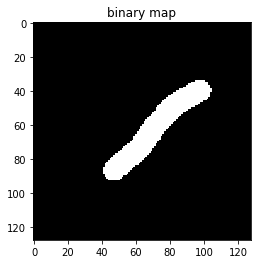

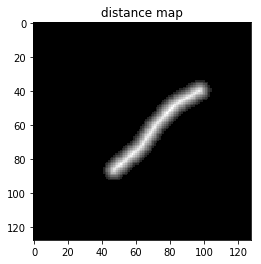

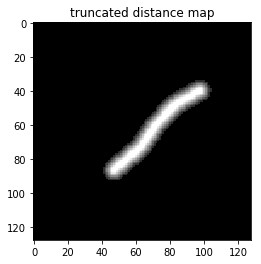

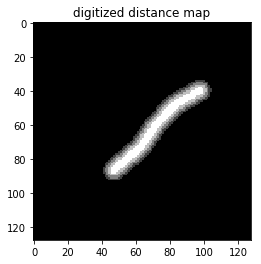

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
mask = load_mask(110)
create_distance_map(mask, plot=True)

In [19]:
def save_dst_mask(i):
    filename = masks_files[i]
    print(filename)
    mask = load_mask(i)
    dst = create_distance_map(mask)
    savefile = os.path.join(save_dir, filename)
#     print(savefile)
    np.save(savefile, dst)

# Run it

In [6]:
for i in range(len(masks_files)):
    save_dst_mask(i)

001_044.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
001_047.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
002_037.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
002_051.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
003_037.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
003_041.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
003_045.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5.5
003_046.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5.5
004_032.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
004_043.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
004_045.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
004_046.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
005_034.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
005_045.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
005_046.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
005_052.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
005_054.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
005_056.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
005_057.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
006_030.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
006_036.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
006_038.n

dst: 0.0 0.0
trun_dst: 0.0 0.0
025_079.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
025_084.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
025_087.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
026_018.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
026_024.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 5.5
026_025.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 5.5
026_032.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
026_039.npy
dst: 0.0 9.055385138137417
trun_dst: 0.0 5.5
026_040.npy
dst: 0.0 9.055385138137417
trun_dst: 0.0 5.5
026_041.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
026_042.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
026_043.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
026_044.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
026_047.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
026_056.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
026_063.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
026_074.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
026_079.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
026_081.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
026_083.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
026_084.npy
dst: 0.0 8.54

dst: 0.0 0.0
trun_dst: 0.0 0.0
040_080.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
040_085.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
040_089.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
040_090.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
040_091.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
040_092.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
041_016.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
041_020.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
041_032.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
041_033.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
041_035.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
041_060.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
041_061.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
041_083.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
041_087.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
041_089.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
041_090.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
041_091.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
042_015.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
042_016.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
042_019.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
042_023.np

057_080.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
057_082.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
057_087.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
057_088.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
057_089.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
058_028.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
058_029.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
058_040.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
058_045.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5.5
058_046.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5.5
058_047.npy
dst: 0.0 9.0
trun_dst: 0.0 5.5
058_048.npy
dst: 0.0 9.0
trun_dst: 0.0 5.5
058_051.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
058_073.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
058_074.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
058_078.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
058_088.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
059_016.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
059_017.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
059_030.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
059_039.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
059_040.npy
dst: 0.0 7.21

072_074.npy
dst: 0.0 10.770329614269007
trun_dst: 0.0 5.5
072_078.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
072_086.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
072_090.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
073_031.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
073_037.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
073_038.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
073_039.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
073_067.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
073_069.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
073_087.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
073_091.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
073_108.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
074_023.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
074_050.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
074_051.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
074_061.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
074_077.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
074_078.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
074_079.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
074_080.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
074_081.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
074_084.np

dst: 0.0 0.0
trun_dst: 0.0 0.0
084_072.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
084_085.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
084_087.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
084_088.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_025.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_039.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_052.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_055.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_062.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_066.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_072.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_086.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
085_087.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5.5
085_094.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_098.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_106.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_110.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
085_112.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
086_018.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
086_028.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
086_032.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
086_037.npy
dst: 0.0 0.0
trun_dst: 0.0

097_119.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
098_027.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
098_032.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
098_039.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
098_058.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
098_064.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
098_079.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
098_080.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
098_089.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
098_097.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
098_098.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
098_107.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
098_117.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
098_118.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
099_016.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
099_020.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
099_024.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
099_031.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
099_050.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
099_051.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
099_060.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
099_078.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
099_079.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 

110_035.npy
dst: 0.0 3.1622776601683795
trun_dst: 0.0 3.1622776601683795
110_047.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
110_050.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
110_073.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
110_086.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
110_088.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
110_091.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
110_095.npy
dst: 0.0 9.486832980505138
trun_dst: 0.0 5.5
110_096.npy
dst: 0.0 9.486832980505138
trun_dst: 0.0 5.5
110_109.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
110_110.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
110_120.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
111_017.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
111_027.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
111_032.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
111_036.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
111_048.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
111_049.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
111_060.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
111_061.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
111_062.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
111_095.npy
dst: 0.0 7.0710678118654755

121_034.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
121_037.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
121_045.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
121_051.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
121_056.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
121_060.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
121_067.npy
dst: 0.0 8.48528137423857
trun_dst: 0.0 5.5
121_068.npy
dst: 0.0 9.848857801796104
trun_dst: 0.0 5.5
121_069.npy
dst: 0.0 7.280109889280518
trun_dst: 0.0 5.5
121_073.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
121_081.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
121_082.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 5.5
121_083.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 5.5
121_102.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
121_109.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
121_118.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
122_039.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
122_040.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
122_045.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
122_050.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
122_052.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
122_063.npy
dst: 0.0 0.0
trun_

130_044.npy
dst: 0.0 12.36931687685298
trun_dst: 0.0 5.5
130_050.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_056.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_063.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_067.npy
dst: 0.0 10.0
trun_dst: 0.0 5.5
130_068.npy
dst: 0.0 10.0
trun_dst: 0.0 5.5
130_069.npy
dst: 0.0 9.899494936611665
trun_dst: 0.0 5.5
130_070.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
130_080.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_084.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_093.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_102.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_104.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_105.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_115.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_120.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_128.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_130.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_133.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
130_135.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
131_034.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
131_041.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
131_046.npy
dst: 0.0 0.0

140_070.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
140_072.npy
dst: 0.0 3.0
trun_dst: 0.0 3.0
140_073.npy
dst: 0.0 7.280109889280518
trun_dst: 0.0 5.5
140_074.npy
dst: 0.0 9.055385138137417
trun_dst: 0.0 5.5
140_093.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
140_096.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 5.5
140_097.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
140_098.npy
dst: 0.0 11.0
trun_dst: 0.0 5.5
140_099.npy
dst: 0.0 12.36931687685298
trun_dst: 0.0 5.5
140_104.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
140_105.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 5.5
140_108.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
140_114.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
140_115.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
140_121.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
140_122.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
140_136.npy
dst: 0.0 9.0
trun_dst: 0.0 5.5
140_137.npy
dst: 0.0 9.0
trun_dst: 0.0 5.5
140_138.npy
dst: 0.0 9.0
trun_dst: 0.0 5.5
141_040.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
141_070.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0

148_045.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
148_056.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
148_057.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
148_058.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5.5
148_059.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5.5
148_060.npy
dst: 0.0 8.48528137423857
trun_dst: 0.0 5.5
148_061.npy
dst: 0.0 8.48528137423857
trun_dst: 0.0 5.5
148_062.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
148_063.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
148_074.npy
dst: 0.0 10.0
trun_dst: 0.0 5.5
148_075.npy
dst: 0.0 10.0
trun_dst: 0.0 5.5
148_076.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
148_077.npy
dst: 0.0 9.899494936611665
trun_dst: 0.0 5.5
148_078.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5.5
148_079.npy
dst: 0.0 9.0
trun_dst: 0.0 5.5
148_080.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
148_116.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
148_119.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
148_120.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
148_121.npy
dst: 0.0 7.0

dst: 0.0 0.0
trun_dst: 0.0 0.0
156_160.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
157_051.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
157_067.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
157_085.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
157_086.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
157_087.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
157_096.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
157_098.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
157_109.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
157_117.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
157_127.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
158_044.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
158_059.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
158_087.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
158_090.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
158_092.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
158_112.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
158_113.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
158_116.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
158_123.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
158_124.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
158_125.npy
dst: 0.0 7

dst: 0.0 8.94427190999916
trun_dst: 0.0 5.5
164_124.npy
dst: 0.0 9.219544457292887
trun_dst: 0.0 5.5
164_125.npy
dst: 0.0 9.219544457292887
trun_dst: 0.0 5.5
164_126.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
164_127.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
164_131.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
164_135.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
164_136.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
164_137.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
164_140.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
164_145.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
164_149.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
164_150.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
164_154.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
164_161.npy
dst: 0.0 13.0
trun_dst: 0.0 5.5
164_162.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
164_163.npy
dst: 0.0 10.0
trun_dst: 0.0 5.5
165_048.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
165_049.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
165_055.npy
dst: 0.0 0.0
trun_dst: 0.

dst: 0.0 0.0
trun_dst: 0.0 0.0
170_169.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
170_170.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
170_175.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
171_049.npy
dst: 0.0 12.0
trun_dst: 0.0 5.5
171_050.npy
dst: 0.0 12.0
trun_dst: 0.0 5.5
171_051.npy
dst: 0.0 11.0
trun_dst: 0.0 5.5
171_058.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
171_100.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 5.5
171_101.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 5.5
171_104.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
171_105.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
171_106.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
171_107.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
171_121.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
171_136.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
171_137.npy
dst: 0.0 11.0
trun_dst: 0.0 5.5
171_138.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
171_139.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
171_147.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
171_151.npy
dst: 0.0

177_069.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
177_070.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
177_071.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
177_079.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 5.5
177_080.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 5.5
177_089.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
177_091.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
177_092.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
177_097.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
177_098.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
177_099.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
177_107.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
177_110.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
177_111.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
177_112.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
177_123.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
177_129.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 5.5
177_130.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
177_131.npy
dst: 0.0 10.0
trun_dst: 0.0 5.5
177_135.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
177_143.npy
dst: 0.0 7.071

dst: 0.0 0.0
trun_dst: 0.0 0.0
184_098.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
184_103.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
184_104.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
184_111.npy
dst: 0.0 9.0
trun_dst: 0.0 5.5
184_112.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
184_120.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
184_122.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
184_123.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
184_125.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 5.5
184_126.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
184_134.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
184_135.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
184_149.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
184_153.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
184_154.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
184_155.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
184_168.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
184_170.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
184_182.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
184_188.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
184_190.npy
dst: 0.0 0.

dst: 0.0 0.0
trun_dst: 0.0 0.0
191_182.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
191_193.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
191_195.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
191_199.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
191_202.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
191_206.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
192_062.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
192_079.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
192_080.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
192_081.npy
dst: 0.0 13.0
trun_dst: 0.0 5.5
192_082.npy
dst: 0.0 8.602325267042627
trun_dst: 0.0 5.5
192_089.npy
dst: 0.0 9.219544457292887
trun_dst: 0.0 5.5
192_090.npy
dst: 0.0 9.0
trun_dst: 0.0 5.5
192_091.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
192_096.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
192_101.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
192_102.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
192_108.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
192_144.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
192_149.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
192_167.npy
dst: 0.0 7.071067811865

dst: 0.0 0.0
trun_dst: 0.0 0.0
199_121.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_132.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_140.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_162.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_179.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_183.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_195.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_196.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_197.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_202.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_209.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
199_210.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
199_213.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_214.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_217.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
199_222.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
200_089.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
200_093.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
200_094.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
200_105.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
200_111.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 

dst: 0.0 0.0
trun_dst: 0.0 0.0
206_083.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
206_087.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
206_094.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
206_095.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
206_096.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
206_097.npy
dst: 0.0 8.602325267042627
trun_dst: 0.0 5.5
206_098.npy
dst: 0.0 8.602325267042627
trun_dst: 0.0 5.5
206_102.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
206_103.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
206_107.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
206_128.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5.5
206_129.npy
dst: 0.0 9.0
trun_dst: 0.0 5.5
206_134.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
206_135.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
206_137.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
206_138.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
206_139.npy
dst: 0.0 10.816653826391969
trun_dst: 0.0 5.5
206_143.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
206_146.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
206_150.npy
dst: 0.0 0.0
trun_dst: 

dst: 0.0 10.816653826391969
trun_dst: 0.0 5.5
213_238.npy
dst: 0.0 10.816653826391969
trun_dst: 0.0 5.5
213_239.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
213_244.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
213_249.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
214_116.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
214_127.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
214_128.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
214_129.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
214_131.npy
dst: 0.0 12.0
trun_dst: 0.0 5.5
214_132.npy
dst: 0.0 12.0
trun_dst: 0.0 5.5
214_153.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
214_173.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
214_180.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
214_181.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
214_192.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
214_194.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
214_199.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
214_204.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
214_214.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
214_215.npy
dst: 0.0 7.2111025509

trun_dst: 0.0 5.5
222_182.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
222_183.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
222_184.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
222_185.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
222_186.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
222_188.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
222_192.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
222_193.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
222_196.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
222_200.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
222_211.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
222_214.npy
dst: 0.0 12.0
trun_dst: 0.0 5.5
222_215.npy
dst: 0.0 12.0
trun_dst: 0.0 5.5
222_223.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 5.5
222_224.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 5.5
222_225.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
222_226.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
222_231.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
222_236.npy
dst: 0.0 7.280109889280518
trun_dst: 0.0 5.5
222_237.npy
dst: 0.0 7.2801098892

dst: 0.0 8.246211251235321
trun_dst: 0.0 5.5
226_203.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 5.5
226_204.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
226_208.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
226_209.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
226_210.npy
dst: 0.0 10.44030650891055
trun_dst: 0.0 5.5
226_211.npy
dst: 0.0 11.180339887498949
trun_dst: 0.0 5.5
226_214.npy
dst: 0.0 9.055385138137417
trun_dst: 0.0 5.5
226_215.npy
dst: 0.0 9.055385138137417
trun_dst: 0.0 5.5
226_216.npy
dst: 0.0 8.0
trun_dst: 0.0 5.5
226_221.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
226_227.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
226_233.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
226_237.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
226_243.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
226_247.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
226_250.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
226_251.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
226_252.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
226_253.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5

dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
228_273.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 5.5
228_278.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
228_279.npy
dst: 0.0 9.219544457292887
trun_dst: 0.0 5.5
228_280.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
228_281.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 5.5
228_282.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 5.5
228_284.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 5.5
229_148.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
229_154.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
229_155.npy
dst: 0.0 9.0
trun_dst: 0.0 5.5
229_157.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
229_158.npy
dst: 0.0 10.0
trun_dst: 0.0 5.5
229_162.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
229_165.npy
dst: 0.0 12.0
trun_dst: 0.0 5.5
229_166.npy
dst: 0.0 9.219544457292887
trun_dst: 0.0 5.5
229_167.npy
dst: 0.0 12.806248474865697
trun_dst: 0.0 5.5
229_180.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
229_181.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
229_185.npy
dst: 0.0 8.602325267042627

231_291.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
232_153.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
232_155.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
232_156.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
232_179.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
232_181.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
232_186.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
232_194.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
232_195.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
232_200.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
232_201.npy
dst: 0.0 12.0
trun_dst: 0.0 5.5
232_205.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 5.5
232_206.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
232_207.npy
dst: 0.0 9.219544457292887
trun_dst: 0.0 5.5
232_208.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 5.5
232_209.npy
dst: 0.0 10.0
trun_dst: 0.0 5.5
232_223.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
232_224.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
232_239.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
232_248.npy
dst: 0.0 0.0
trun_dst: 0.

237_220.npy
dst: 0.0 8.48528137423857
trun_dst: 0.0 5.5
237_223.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
237_224.npy
dst: 0.0 11.0
trun_dst: 0.0 5.5
237_225.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
237_226.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 5.5
237_230.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
237_231.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
237_232.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
237_233.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
237_236.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
237_242.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
237_243.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 5.5
237_244.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
237_245.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
237_264.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
237_265.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
237_277.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
237_279.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
237_286.npy
dst: 0.0 0.0

dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
243_254.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
243_261.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
243_262.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
243_279.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
243_297.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
244_232.npy
dst: 0.0 12.041594578792296
trun_dst: 0.0 5.5
244_233.npy
dst: 0.0 12.041594578792296
trun_dst: 0.0 5.5
244_234.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
244_235.npy
dst: 0.0 10.198039027185569
trun_dst: 0.0 5.5
244_236.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
244_240.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
244_241.npy
dst: 0.0 9.219544457292887
trun_dst: 0.0 5.5
244_242.npy
dst: 0.0 10.0
trun_dst: 0.0 5.5
244_243.npy
dst: 0.0 8.602325267042627
trun_dst: 0.0 5.5
244_245.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
244_247.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
244_249.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
244_250.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
244_252.npy
dst: 0.0 1.0
trun_dst: 0.0 1.0
244_254.npy
dst: 0.0 7.071067811865

dst: 0.0 0.0
trun_dst: 0.0 0.0
250_226.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
250_233.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
250_239.npy
dst: 0.0 7.0
trun_dst: 0.0 5.5
250_240.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
250_241.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
250_251.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
250_252.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 5.5
250_262.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
250_277.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
250_279.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
250_280.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 5.5
250_286.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 5.5
250_287.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 5.5
250_292.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
250_293.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
250_303.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
251_229.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
251_235.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
251_238.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
251_276.npy
dst: 0.0 0.0
trun_dst: 0.

# Codes

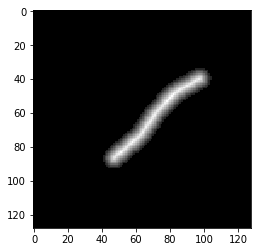

In [151]:
#distanceTransformation
from scipy import ndimage
dst = ndimage.distance_transform_edt(mask)
plt.imshow(dst,cmap='gray')

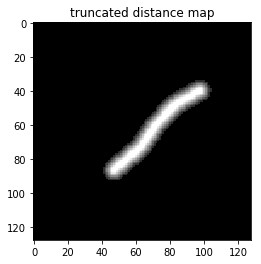

In [153]:
#Truncate it use Threshold R
R = 5.5
trun_dst = np.where(dst>R, R, dst)
plt.title('truncated distance map')
plt.imshow(trun_dst,cmap='gray')

In [146]:
print(np.min(dst),np.max(dst))
print(np.min(trun_dst),np.max(trun_dst))

0.0 7.0710678118654755
0.0 5.5


[0 1 2 3 4]


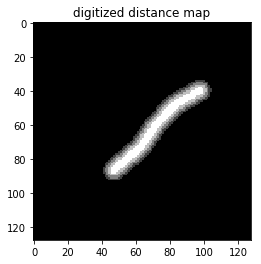

In [155]:
bins = np.array([0.0, 1.5, 3.0, 4.5,7])
quan_dist = np.digitize(trun_dst, bins, right=True)
plt.title('digitized distance map')
plt.imshow(quan_dist,cmap='gray')
print(np.unique(quan_dist))

In [10]:
a = np.array([[1,2],[3,4]])
mask = np.eye(5)[a]

In [12]:
print(mask.shape)

(2, 2, 5)
